In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import pywt
import evaluation

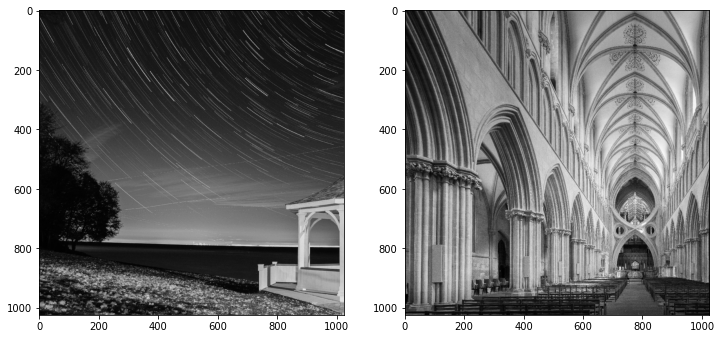

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
im = Image.open('images/cover/099902.jpg').convert('L')
cover = np.array(im)  # 2D array
secret = np.array(Image.open('images/secret/test.jpg').convert('L'))

cover = cover / 255
secret = secret / 255

axes[0].imshow(cover*255, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(secret*255, cmap='gray', vmin=0, vmax=255)

plt.show()

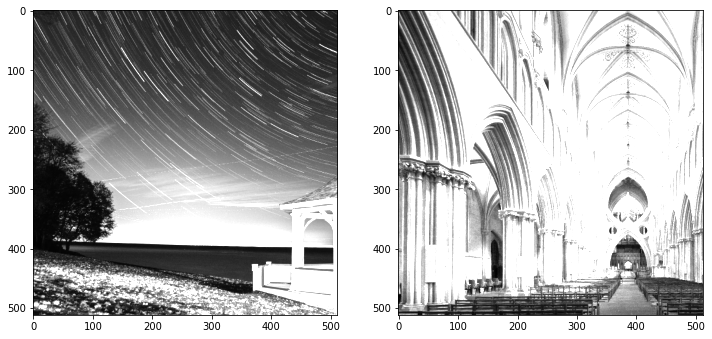

In [13]:
alpha = 0.01
wavelet = 'db1'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
LL, other_cover = pywt.dwt2(cover, wavelet)
qc, rc = np.linalg.qr(LL)

LL_secret, other_secret = pywt.dwt2(secret, wavelet)
qs, rs = np.linalg.qr(LL_secret)

axes[0].imshow(LL*255, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(LL_secret*255, cmap='gray', vmin=0, vmax=255)

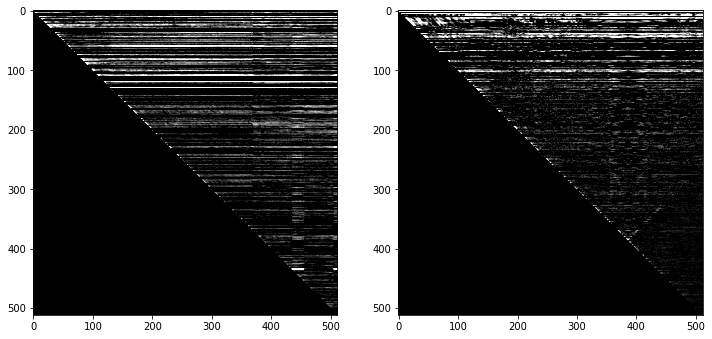

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].imshow(rc*255, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(rs*255, cmap='gray', vmin=0, vmax=255)

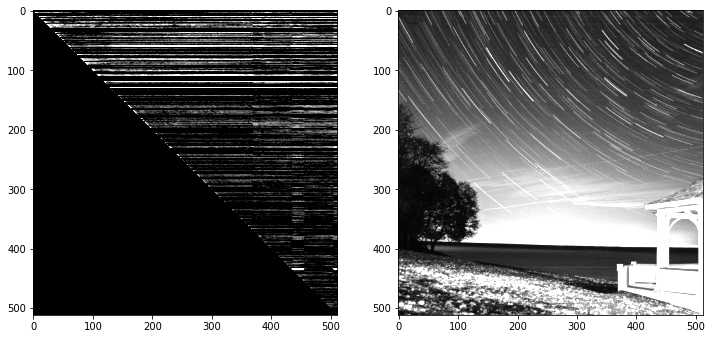

In [16]:
r_combined = rc + (alpha * rs)
stego = qc @ r_combined
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].imshow(r_combined*255, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(stego*255, cmap='gray', vmin=0, vmax=255)

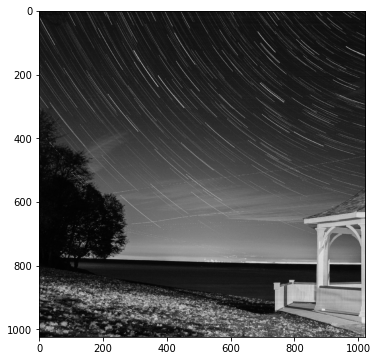

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
stego = pywt.idwt2((stego, other_cover), wavelet)
axes.imshow(stego*255, cmap='gray', vmin=0, vmax=255)

In [ ]:
# Now with discrete fourier transform

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
LL, other_cover = pywt.dwt2(cover, wavelet)
qc, rc = np.linalg.qr(LL)

LL_secret, other_secret = pywt.dwt2(secret, wavelet)
qs, rs = np.linalg.qr(LL_secret)

axes[0].imshow(LL*255, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(LL_secret*255, cmap='gray', vmin=0, vmax=255)